[0]	train-rmse:8.20594e+06	test-rmse:8.20866e+06
[50]	train-rmse:2.52366e+06	test-rmse:2.89355e+06
[100]	train-rmse:2.1885e+06	test-rmse:2.70663e+06
[150]	train-rmse:2.06704e+06	test-rmse:2.66992e+06
[200]	train-rmse:1.9845e+06	test-rmse:2.65217e+06
[250]	train-rmse:1.91685e+06	test-rmse:2.64127e+06
[300]	train-rmse:1.85712e+06	test-rmse:2.63412e+06
[350]	train-rmse:1.79966e+06	test-rmse:2.62958e+06
[400]	train-rmse:1.75223e+06	test-rmse:2.62651e+06
[450]	train-rmse:1.70567e+06	test-rmse:2.62484e+06
[500]	train-rmse:1.66513e+06	test-rmse:2.62478e+06


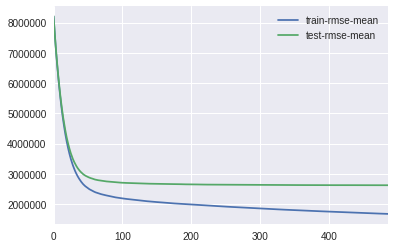

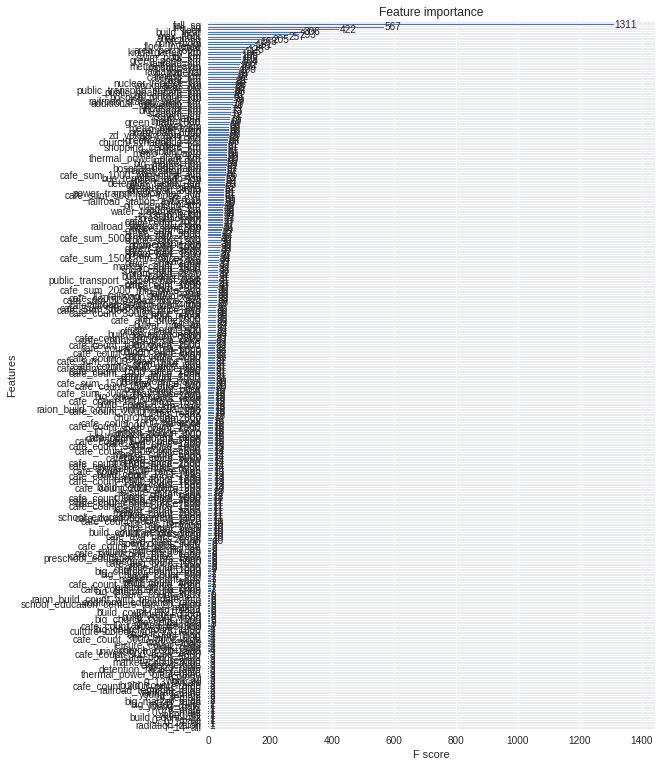

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
import xgboost as xgb
import datetime
%matplotlib inline
#now = datetime.datetime.now()

train = pd.read_csv('/home/kazuki/Sberbank/train.csv/train.csv')
test = pd.read_csv('/home/kazuki/Sberbank/test.csv/test.csv')
macro = pd.read_csv('/home/kazuki/Sberbank/macro.csv')
id_test = test.id
train.sample(3)
# Any results you write to the current directory are saved as output.

#Thanks to Amandeep Rathee
y_train = train["price_doc"]
x_train = train.drop(["id", "timestamp", "price_doc"], axis=1)
x_test = test.drop(["id", "timestamp"], axis=1)

x_train['year_old']=2020-x_train['build_year']
x_test['year_old']=2020-x_test['build_year']

x_train['floor_inverse']=x_train['max_floor']-x_train['floor']
x_test['floor_inverse']=x_test['max_floor']-x_test['floor']

x_train['area_ratio']=(x_train['full_sq']-x_train['life_sq'])*100/x_train['life_sq']
x_test['area_ratio']=(x_test['full_sq']-x_test['life_sq'])*100/x_test['life_sq']

x_train['area_per_room']=x_train['life_sq']/x_train['num_room']
x_test['area_per_room']=x_test['life_sq']/x_test['num_room']





#can't merge train with test because the kernel run for very long time

for c in x_train.columns:
    if x_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[c].values)) 
        x_train[c] = lbl.transform(list(x_train[c].values))
        #x_train.drop(c,axis=1,inplace=True)
        
for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values)) 
        x_test[c] = lbl.transform(list(x_test[c].values))
        #x_test.drop(c,axis=1,inplace=True)    
        
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()

num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model,height=0.5, ax=ax)

y_predict = model.predict(dtest)
output = pd.DataFrame({'id': id_test, 'price_doc': y_predict})
output.head()

output.to_csv('xgbSub.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
import xgboost as xgb
import datetime

In [ ]:
train = pd.read_csv('/home/kazuki/Sberbank/train.csv/train.csv')
test = pd.read_csv('/home/kazuki/Sberbank/test.csv/test.csv')
macro = pd.read_csv('/home/kazuki/Sberbank/macro.csv')
id_test = test.id
print id_test
train.sample(3)

In [ ]:
y_train = train["price_doc"]
print y_train

In [ ]:
x_train = train.drop(["id","timestamp","price_doc"],axis=1)
print x_train

In [ ]:
x_test = test.drop(["id","timestamp"],axis=1)
print x_test

In [ ]:


x_train['year_old']=2020-x_train['build_year']
x_test['year_old']=2020-x_test['build_year']

x_train['floor_inverse']=x_train['max_floor']-x_train['floor']
x_test['floor_inverse']=x_test['max_floor']-x_test['floor']

x_train['area_ratio']=(x_train['full_sq']-x_train['life_sq'])*100/x_train['life_sq']
x_test['area_ratio']=(x_test['full_sq']-x_test['life_sq'])*100/x_test['life_sq']

x_train['area_per_room']=x_train['life_sq']/x_train['num_room']
x_test['area_per_room']=x_test['life_sq']/x_test['num_room']

In [ ]:
#can't merge train with test because the kernel run for very long time

for c in x_train.columns:
    if x_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[c].values)) 
        x_train[c] = lbl.transform(list(x_train[c].values))
        #x_train.drop(c,axis=1,inplace=True)
        
for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values)) 
        x_test[c] = lbl.transform(list(x_test[c].values))
        #x_test.drop(c,axis=1,inplace=True)    
        
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()

num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)

y_predict = model.predict(dtest)
output = pd.DataFrame({'id': id_test, 'price_doc': y_predict})
output.head()

output.to_csv('xgbSub.csv', index=False)